## Import Libraries

In [1]:
#conda install -c anaconda beautifulsoup4
import pandas as pd
from bs4 import BeautifulSoup
import requests
#conda install -c conda-forge geopy 
from geopy.geocoders import Nominatim
import folium
import json 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
#conda install -c conda-forge geocoder
import geocoder
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/Category:Community_areas_of_Chicago").text

In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html.parser')

In [4]:
# create a list to store neighborhood data
neighborhoodList = []

In [5]:
# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

In [6]:
# create a new DataFrame from the list
df = pd.DataFrame({"Neighborhood": neighborhoodList})
df.head

<bound method NDFrame.head of                                 Neighborhood
0                 Community areas in Chicago
1        Template:Community areas of Chicago
2                         11th Ward, Chicago
3   42nd Precinct / Town Hall Police Station
4                       Albany Park, Chicago
..                                       ...
77                        West Lawn, Chicago
78                     West Pullman, Chicago
79                       West Ridge, Chicago
80                        West Town, Chicago
81                         Woodlawn, Chicago

[82 rows x 1 columns]>

In [7]:
df.loc[df.Neighborhood == 'Midway Park, Chicago']

,Neighborhood
48,"Midway Park, Chicago"


In [8]:
df.drop([0,1,2,3,48], inplace = True)
df = df.reset_index(drop=True)
df

,Neighborhood
0,"Albany Park, Chicago"
1,"Archer Heights, Chicago"
2,"Armour Square, Chicago"
3,"Ashburn, Chicago"
4,"Auburn Gresham, Chicago"
...,...
72,"West Lawn, Chicago"
73,"West Pullman, Chicago"
74,"West Ridge, Chicago"
75,"West Town, Chicago"


In [9]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Illinois'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [10]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(neighborhood) for neighborhood in df["Neighborhood"].tolist() ]

In [11]:
coords

[[41.968290000000025, -87.72337999999996],
 [41.811540000000036, -87.72555999999997],
 [41.834580000000074, -87.63188999999994],
 [41.74785000000003, -87.70994999999994],
 [41.74319000000003, -87.65503999999999],
 [41.887740000000065, -87.76391999999998],
 [41.745070000000055, -87.58815999999996],
 [41.93925000000007, -87.71124999999995],
 [41.92802000000006, -87.75383999999997],
 [41.71563000000003, -87.67280999999997],
 [41.83798000000007, -87.65089999999998],
 [41.818610000000035, -87.69947999999994],
 [41.72031000000004, -87.59749999999997],
 [41.73336000000006, -87.57741999999996],
 [41.74108000000007, -87.61302999999998],
 [41.77543000000003, -87.69633999999996],
 [41.77809000000008, -87.75977999999998],
 [41.840850000000046, -87.61719999999997],
 [41.95274000000006, -87.79650999999996],
 [41.878630000000044, -87.70513999999997],
 [41.71207000000004, -87.53067999999996],
 [41.98571000000004, -87.66345999999999],
 [42.00789000000003, -87.81398999999999],
 [41.77978000000007, -87.6

In [12]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df_coords

,Latitude,Longitude
0,41.96829,-87.72338
1,41.81154,-87.72556
2,41.83458,-87.63189
3,41.74785,-87.70995
4,41.74319,-87.65504
...,...,...
72,41.77315,-87.72445
73,41.67951,-87.64189
74,41.99948,-87.69266
75,41.89329,-87.65743


In [13]:
# merge the coordinates into the original dataframe
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [14]:
df

,Neighborhood,Latitude,Longitude
0,"Albany Park, Chicago",41.96829,-87.72338
1,"Archer Heights, Chicago",41.81154,-87.72556
2,"Armour Square, Chicago",41.83458,-87.63189
3,"Ashburn, Chicago",41.74785,-87.70995
4,"Auburn Gresham, Chicago",41.74319,-87.65504
...,...,...,...
72,"West Lawn, Chicago",41.77315,-87.72445
73,"West Pullman, Chicago",41.67951,-87.64189
74,"West Ridge, Chicago",41.99948,-87.69266
75,"West Town, Chicago",41.89329,-87.65743


In [201]:
# save the DataFrame as CSV file
#kl_df.to_csv("Chicago_Community.csv", index=False)

In [15]:
#Updated CSV file with the number for each neighborhood
df = pd.read_csv('Chicago_Community.csv')
df

,Neighborhood,Latitude,Longitude,Number
0,"Albany Park, Chicago",41.96829,-87.72338,14
1,"Archer Heights, Chicago",41.81154,-87.72556,57
2,"Armour Square, Chicago",41.83458,-87.63189,34
3,"Ashburn, Chicago",41.74785,-87.70995,70
4,"Auburn Gresham, Chicago",41.74319,-87.65504,71
...,...,...,...,...
72,"West Lawn, Chicago",41.77315,-87.72445,65
73,"West Pullman, Chicago",41.67951,-87.64189,53
74,"West Ridge, Chicago",41.99948,-87.69266,2
75,"West Town, Chicago",41.89329,-87.65743,24


In [16]:
# get the coordinates of Kuala Lumpur
geolocator = Nominatim(user_agent="SD25")
location = geolocator.geocode("Chicago, Illinois")
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago, Illinois is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago, Illinois is 41.8755616, -87.6244212.


In [17]:
# create map of Chicago using latitude and longitude values
map_Chicago = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Chicago)  
    
map_Chicago

In [43]:
# save the map as HTML file
map_Chicago.save('map_Chicago.html')

In [18]:
CLIENT_ID = 'NTRQHQBQPAVHKGAYHYEBTHQFZSG3CJVYJWNL0544FSX032TV' 
CLIENT_SECRET = 'YX0Q2FHJXTGZYBEQCALXI1J0QEUX1Z2AETSQX3FQCT2F1VNI' 
VERSION = '20180605'

In [19]:
radius = 500
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [20]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1615, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,"Albany Park, Chicago",41.96829,-87.72338,Lawrence Fish Market,41.968280,-87.726250,Seafood Restaurant
1,"Albany Park, Chicago",41.96829,-87.72338,Chicago Kalbi Korean BBQ,41.968314,-87.722771,Korean Restaurant
2,"Albany Park, Chicago",41.96829,-87.72338,El Gallo Bravo #6,41.968324,-87.721338,Mexican Restaurant
3,"Albany Park, Chicago",41.96829,-87.72338,Starbucks,41.968911,-87.728817,Coffee Shop
4,"Albany Park, Chicago",41.96829,-87.72338,Rojo Gusano,41.968425,-87.724549,Taco Place


In [21]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))
# print out the list of categories
venues_df['VenueCategory'].unique()[:100]

There are 258 uniques categories.


array(['Seafood Restaurant', 'Korean Restaurant', 'Mexican Restaurant',
       'Coffee Shop', 'Taco Place', 'Fried Chicken Joint',
       'Discount Store', 'Dive Bar', 'Pet Store', 'Mobile Phone Shop',
       'Pharmacy', 'Fast Food Restaurant', 'Cosmetics Shop', 'Bank',
       'Park', 'Hookah Bar', 'Clothing Store', 'Bus Station',
       'Playground', 'Pizza Place', 'Financial or Legal Service',
       'Accessories Store', 'Grocery Store', 'Wings Joint',
       'Big Box Store', 'Gym / Fitness Center', 'Bar', 'Sandwich Place',
       'Video Store', 'Gas Station', 'Hot Dog Joint', 'Business Service',
       'Bakery', 'Optical Shop', 'College Rec Center', 'Historic Site',
       'Sports Bar', 'American Restaurant', 'Italian Restaurant',
       'Bagel Shop', 'Asian Restaurant', 'Disc Golf', 'Indian Restaurant',
       'Chinese Restaurant', 'Restaurant', 'Baseball Stadium',
       'Electronics Store', 'Light Rail Station', 'Automotive Shop',
       'Construction & Landscaping', 'Home Servic

In [22]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
"Albany Park, Chicago",26,26,26,26,26,26
"Archer Heights, Chicago",25,25,25,25,25,25
"Armour Square, Chicago",22,22,22,22,22,22
"Ashburn, Chicago",7,7,7,7,7,7
"Auburn Gresham, Chicago",5,5,5,5,5,5
...,...,...,...,...,...,...
"West Lawn, Chicago",14,14,14,14,14,14
"West Pullman, Chicago",11,11,11,11,11,11
"West Ridge, Chicago",38,38,38,38,38,38


In [23]:
# one hot encoding
df_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()

(1615, 259)


,Neighborhoods,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Albany Park, Chicago",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Albany Park, Chicago",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Albany Park, Chicago",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Albany Park, Chicago",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Albany Park, Chicago",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_grouped = df_onehot.groupby(["Neighborhoods"]).mean().reset_index()
print(df_grouped.shape)
df_grouped

(77, 259)


,Neighborhoods,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Albany Park, Chicago",0.0,0.038462,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
1,"Archer Heights, Chicago",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.040000,0.0,0.0,0.0,0.0,0.0,0.04,0.000000
2,"Armour Square, Chicago",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
3,"Ashburn, Chicago",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
4,"Auburn Gresham, Chicago",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"West Lawn, Chicago",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
73,"West Pullman, Chicago",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.0,0.090909,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
74,"West Ridge, Chicago",0.0,0.000000,0.026316,0.0,0.0,0.0,0.0,0.0,0.026316,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
75,"West Town, Chicago",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.022222,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.066667


In [25]:
df_Dine = df_grouped[["Neighborhoods","Chinese Restaurant"]]
df_Dine.head()

,Neighborhoods,Chinese Restaurant
0,"Albany Park, Chicago",0.000000
1,"Archer Heights, Chicago",0.000000
2,"Armour Square, Chicago",0.045455
3,"Ashburn, Chicago",0.000000
4,"Auburn Gresham, Chicago",0.000000


In [26]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep=""))
    Sum_of_squared_distances.append(km.inertia_)

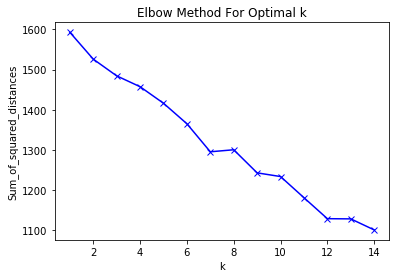

In [27]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
# set number of clusters
kclusters = 4

df_clustering = df_Dine.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 3, 0, 0, 0, 0, 3, 3, 0], dtype=int32)

In [29]:
df_merged = df_Dine.copy()

# add clustering labels
df_merged["Cluster Labels"] = kmeans.labels_

In [30]:
df_merged

,Neighborhoods,Chinese Restaurant,Cluster Labels
0,"Albany Park, Chicago",0.000000,0
1,"Archer Heights, Chicago",0.000000,0
2,"Armour Square, Chicago",0.045455,3
3,"Ashburn, Chicago",0.000000,0
4,"Auburn Gresham, Chicago",0.000000,0
...,...,...,...
72,"West Lawn, Chicago",0.000000,0
73,"West Pullman, Chicago",0.090909,2
74,"West Ridge, Chicago",0.000000,0
75,"West Town, Chicago",0.000000,0


In [31]:
df_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
df_merged

,Neighborhood,Chinese Restaurant,Cluster Labels
0,"Albany Park, Chicago",0.000000,0
1,"Archer Heights, Chicago",0.000000,0
2,"Armour Square, Chicago",0.045455,3
3,"Ashburn, Chicago",0.000000,0
4,"Auburn Gresham, Chicago",0.000000,0
...,...,...,...
72,"West Lawn, Chicago",0.000000,0
73,"West Pullman, Chicago",0.090909,2
74,"West Ridge, Chicago",0.000000,0
75,"West Town, Chicago",0.000000,0


In [32]:
df_merged['Number'] = df['Number']
fixed_columns = [df_merged.columns[-1]] + list(df_merged.columns[:-1])
df_merged = df_merged[fixed_columns]
df_merged

,Number,Neighborhood,Chinese Restaurant,Cluster Labels
0,14,"Albany Park, Chicago",0.000000,0
1,57,"Archer Heights, Chicago",0.000000,0
2,34,"Armour Square, Chicago",0.045455,3
3,70,"Ashburn, Chicago",0.000000,0
4,71,"Auburn Gresham, Chicago",0.000000,0
...,...,...,...,...
72,65,"West Lawn, Chicago",0.000000,0
73,53,"West Pullman, Chicago",0.090909,2
74,2,"West Ridge, Chicago",0.000000,0
75,24,"West Town, Chicago",0.000000,0


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [110]:
# save the map as HTML file
# map_clusters.save('map_clusters.html')

In [34]:
df_merged.loc[df_merged['Cluster Labels'] == 0]

,Number,Neighborhood,Chinese Restaurant,Cluster Labels
0,14,"Albany Park, Chicago",0.0,0
1,57,"Archer Heights, Chicago",0.0,0
3,70,"Ashburn, Chicago",0.0,0
4,71,"Auburn Gresham, Chicago",0.0,0
5,25,"Austin, Chicago",0.0,0
...,...,...,...,...
71,26,"West Garfield Park, Chicago",0.0,0
72,65,"West Lawn, Chicago",0.0,0
74,2,"West Ridge, Chicago",0.0,0
75,24,"West Town, Chicago",0.0,0


In [35]:
df_merged.loc[df_merged['Cluster Labels'] == 1]

,Number,Neighborhood,Chinese Restaurant,Cluster Labels
61,49,"Roseland, Chicago",0.5,1


In [36]:
df_merged.loc[df_merged['Cluster Labels'] == 2]

,Number,Neighborhood,Chinese Restaurant,Cluster Labels
10,60,"Bridgeport, Chicago",0.108108,2
26,63,"Fuller Park, Chicago",0.111111,2
31,20,"Hegewisch, Chicago",0.100000,2
48,33,"Near South Side, Chicago",0.164557,2
52,29,"North Lawndale, Chicago",0.100000,2
73,53,"West Pullman, Chicago",0.090909,2


In [37]:
df_merged.loc[df_merged['Cluster Labels'] == 3]

,Number,Neighborhood,Chinese Restaurant,Cluster Labels
2,34,"Armour Square, Chicago",0.045455,3
7,21,"Avondale, Chicago",0.074074,3
8,19,"Belmont Cragin, Chicago",0.055556,3
35,11,"Irving Park, Chicago",0.043478,3
36,39,"Jefferson Park, Chicago",0.033333,3
37,6,"Kenwood, Chicago",0.052632,3


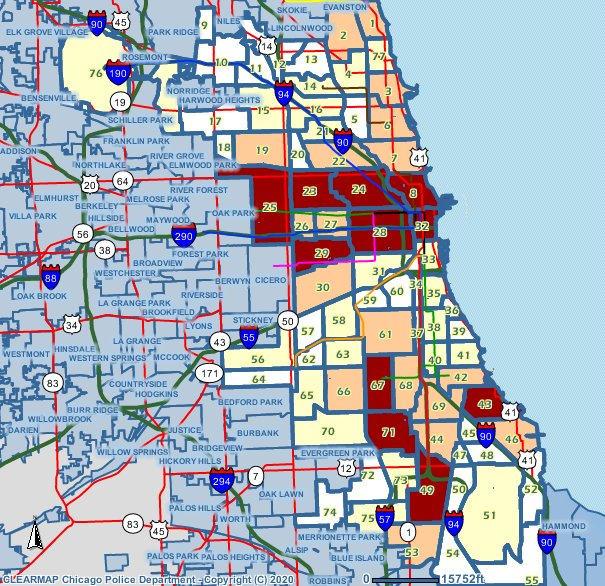

In [39]:
from IPython.display import Image
Image("http://gis.chicagopolice.org/output/clearMap_sums_gisc50567608293.jpg")
